In [25]:
import numpy as np
import matplotlib.pylab as plt
import plotly.graph_objects as go
from plotly.offline import plot
from ipywidgets import widgets
import uproot
from icecube.icetray import *

from waveform_methods import *

In [26]:
run = 72
event = 5039
x_new = process_file(run,event,'12360.npy','geometry.npy')
file_1 = np.load('12360.npy',allow_pickle=True,encoding='latin1').item()
file_2 = np.load('12362.npy',allow_pickle=True,encoding='latin1').item()
run2 = 10
event2 = 11876

In [27]:
print(file_1[72][12866].keys())
found = False
for i in file_1.keys():
    for j in file_1[i].keys():
        if 20<file_1[i][j]['zenith']*180.0/np.pi < 30:
            found = True
            print(i,j,file_1[i][j]['azimuth']*180.0/np.pi,file_1[i][j]['zenith']*180.0/np.pi)
            break
    if found:
        break

dict_keys(['energy', 'zenith', 'azimuth', 'x', 'y', 'z', 'time', 't_cog', 'waveform_info', 'waveforms', 'waveform_time', 'waveform_binwidth', 'waveform_radius', 'All_pulses', 'SLCKeys', 'SLC_Info'])
72 5039 66.19691436915595 23.329175346075335


In [28]:
file1 = '12360.npy'
file2 = '12362.npy'

In [5]:
get_event(x_new,run,event,1000,'event2.html',True)
waveform_output(x_new,run,event,'event2_waveforms.html',True,CDF=True)

In [29]:
radius = []
signal_50 = []
signal_90 = []
energy = []
charge = []
time_90 = []
time = []
SLC_charge = []
HLC_charge = []
radius_SLC = []
all_charge = []
all_time = []
all_radius = []

for run in file_1.keys():
    for event in file_1[run].keys():
        x_new = file_1[run][event]
        signal_90_prime = []
        signal_50_prime = []
        time_90_prime = []
        charge_prime = []
        radius_prime = []
        time_prime = []
        SLC_charge_prime = []
        HLC_charge_prime = []
        radius_SLC_prime = []
        all_charge_prime = []
        all_time_prime = []
        all_radius_prime = []
        
        for i in x_new['waveform_radius'].keys():
            radius_prime.append(x_new['waveform_radius'][i])
            i=str(i)
        #for i  in list(x_new['waveform_info'].keys()):
            signal_90_prime.append(x_new['waveform_info'][i]['Time_90']-x_new['waveform_info'][i]['Time_10'])
            signal_50_prime.append(x_new['waveform_info'][i]['Time_50']-x_new['waveform_info'][i]['Time_10'])
            time_90_prime.append(x_new['waveform_info'][i]['Time_90'])
            charge_prime.append(x_new['waveform_info'][i]['Charge_PE'])
            time_prime.append(x_new['waveform_info'][i]['Time_90'])
            HLC_charge_prime.append(x_new['waveform_info'][i]['Charge_PE'])
            
            value = i.split(',')[0].split('(')[-1]
                
            
        for key in x_new['SLC_Info']['charge'].keys():
            charge_prime.append(x_new['SLC_Info']['charge'][key])
            time_prime.append(x_new['SLC_Info']['time'][key])
            SLC_charge_prime.append(x_new['SLC_Info']['charge'][key])
            radius_SLC_prime.append(x_new['SLC_Info']['radius'][key])
            
        for key in x_new['All_pulses'].keys():
            all_charge_prime.append(x_new['All_pulses'][key]['charge'])
            all_time_prime.append(x_new['All_pulses'][key]['time'])
            all_radius_prime.append(x_new['All_pulses'][key]['radius'])
        
        radius.append(radius_prime)
        signal_50.append(signal_50_prime)
        signal_90.append(signal_90_prime)
        charge.append(charge_prime)
        time_90.append(time_90_prime)
        energy.append(x_new['energy'])
        time.append(time_prime)
        SLC_charge.append(SLC_charge_prime)
        HLC_charge.append(HLC_charge_prime)
        radius_SLC.append(radius_SLC_prime)
        all_charge.append(all_charge_prime)
        all_time.append(all_time_prime)
        all_radius.append(all_radius_prime)


In [30]:
for run in file_2.keys():
    for event in file_2[run].keys():
        x_new = file_2[run][event]
        signal_90_prime = []
        signal_50_prime = []
        time_90_prime = []
        charge_prime = []
        radius_prime = []
        time_prime = []
        SLC_charge_prime = []
        HLC_charge_prime = []
        radius_SLC_prime = []
        all_charge_prime = []
        all_time_prime = []
        all_radius_prime = []
        
        for i in x_new['waveform_radius'].keys():
            radius_prime.append(x_new['waveform_radius'][i])
        #for i  in list(x_new['waveform_info'].keys()):
            i = str(i)
            signal_90_prime.append(x_new['waveform_info'][i]['Time_90']-x_new['waveform_info'][i]['Time_10'])
            signal_50_prime.append(x_new['waveform_info'][i]['Time_50']-x_new['waveform_info'][i]['Time_10'])
            time_90_prime.append(x_new['waveform_info'][i]['Time_90'])
            charge_prime.append(x_new['waveform_info'][i]['Charge_PE'])
            time_prime.append(x_new['waveform_info'][i]['Time_90'])
            HLC_charge_prime.append(x_new['waveform_info'][i]['Charge_PE'])
            
        for key in x_new['SLC_Info']['charge'].keys():
            charge_prime.append(x_new['SLC_Info']['charge'][key])
            time_prime.append(x_new['SLC_Info']['time'][key])
            SLC_charge_prime.append(x_new['SLC_Info']['charge'][key])
            radius_SLC_prime.append(x_new['SLC_Info']['radius'][key])
            
        for key in x_new['All_pulses'].keys():
            all_charge_prime.append(x_new['All_pulses'][key]['charge'])
            all_time_prime.append(x_new['All_pulses'][key]['time'])
            all_radius_prime.append(x_new['All_pulses'][key]['radius'])
            
        
        radius.append(radius_prime)
        signal_50.append(signal_50_prime)
        signal_90.append(signal_90_prime)
        charge.append(charge_prime)
        time_90.append(time_90_prime)
        energy.append(x_new['energy'])
        time.append(time_prime)
        SLC_charge.append(SLC_charge_prime)
        HLC_charge.append(HLC_charge_prime)
        radius_SLC.append(radius_SLC_prime)
        all_charge.append(all_charge_prime)
        all_time.append(all_time_prime)
        all_radius.append(all_radius_prime)

In [31]:
plot_value = [np.append(i,j) for i,j in zip(SLC_charge,HLC_charge)]
radius_value = [np.append(i,j) for i,j in zip(radius_SLC,radius)]

In [32]:
check = []
for i in energy:
    if i <= 8 and i > 7.5:
        check.append(True)
    else:
        check.append(False)
        
proton_check = []
iron_check = []
for i in range(len(check)):
    if check[i]:
        if i < 1000:
            proton_check.append(i)
        else:
            iron_check.append(i)

In [33]:
proton = []
proton_radius = []
iron = []
iron_radius = []
energy_proton = []
energy_iron = []

for i in range(len(proton_check)):
    if proton_check[i]:
        proton.append(plot_value[i])
        proton_radius.append(radius_value[i])
        energy_proton.append(energy[i])
       
count = 0

for i in range(len(iron_check)):
    if iron_check[i]:
        value = i+1000
        iron.append(plot_value[value])
        iron_radius.append(radius_value[value])
        energy_iron.append(energy[value])
    count +=1
proton = np.hstack(proton)
proton_radius = np.hstack(proton_radius)
iron = np.hstack(iron)
iron_radius = np.hstack(iron_radius)
energy_proton = np.hstack(energy_proton)
energy_iron = np.hstack(energy_iron)

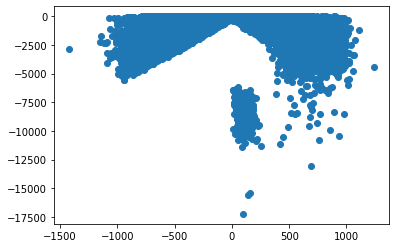

In [75]:
x = []
y = []
for number in range(1000):
    for i in range(len(all_time[number])):
        if all_time[number][i] < 0:
            x.append(-all_radius[number][i])
            y.append(all_time[number][i])
        else:
            x.append(all_radius[number][i])
            y.append(-all_time[number][i])
plt.scatter(x,y)
plt.show()

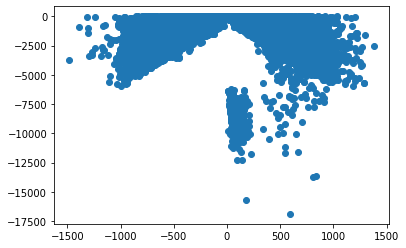

In [76]:
x1 = []
y1 = []
for number in range(1000,2000):
    for i in range(len(all_time[number])):
        if all_time[number][i] < 0:
            x1.append(-all_radius[number][i])
            y1.append(all_time[number][i])
        else:
            x1.append(all_radius[number][i])
            y1.append(-all_time[number][i])
plt.scatter(x1,y1)
plt.show()

In [77]:
mean1,std1,bins1 = binning(x,y,bins=100)
mean2,std2,bins2 = binning(x1,y1,bins=100)

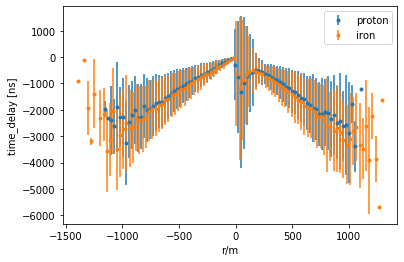

In [89]:
plt.errorbar(bins1,mean1,yerr=std1,fmt='.',label='proton')
plt.errorbar(bins2,mean2,yerr=std2,fmt='.',label='iron')
plt.xlabel('r/m')
plt.ylabel('time_delay [ns]')
plt.legend()
plt.savefig('Mean_value_for_deltaT')